In [1]:
# default_exp data

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import nbdev.showdoc as literacy

In [4]:
#export
from speechsep.imports import *
from speechsep.core import *

# DataBlocks

# Audio DataBlocks

In [5]:
fn = Path("../data")

In [6]:
#export
audio_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('audio/'))

def get_audio_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=audio_extensions, recurse=recurse, folders=folders)

def AudioBlock(cls=AudioMono): return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)

def SpecBlock(cls=AudioMono): return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)

# Test same Process

In [7]:
data = DataBlock(blocks=(AudioBlock(), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label)

In [8]:
dbunch = data.databunch(fn, item_tfms=(Resample(22050), Clip(5)), bs=2)

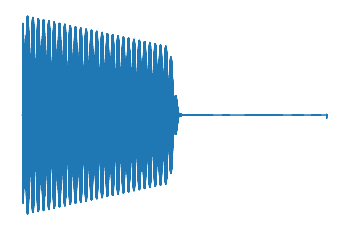

In [9]:
dbunch.dataset[0][0].show()

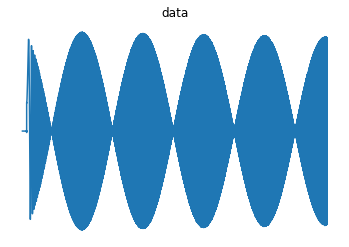

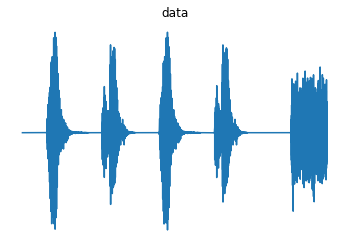

In [10]:
dbunch.show_batch()

## MESS

In [11]:
show_audio??